In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Alopecia Folder has 2527 Images
balness Folder has 534 Images
dandruff Folder has 317 Images
Images Folder has 3378 Images


In [3]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3376 files belonging to 3 classes.
Using 2701 files for training.
Found 3376 files belonging to 3 classes.
Using 675 files for validation.


In [5]:
Diseases_names = train_ds.class_names
Diseases_names

['Alopecia', 'balness', 'dandruff']

In [6]:
import matplotlib.pyplot as plt

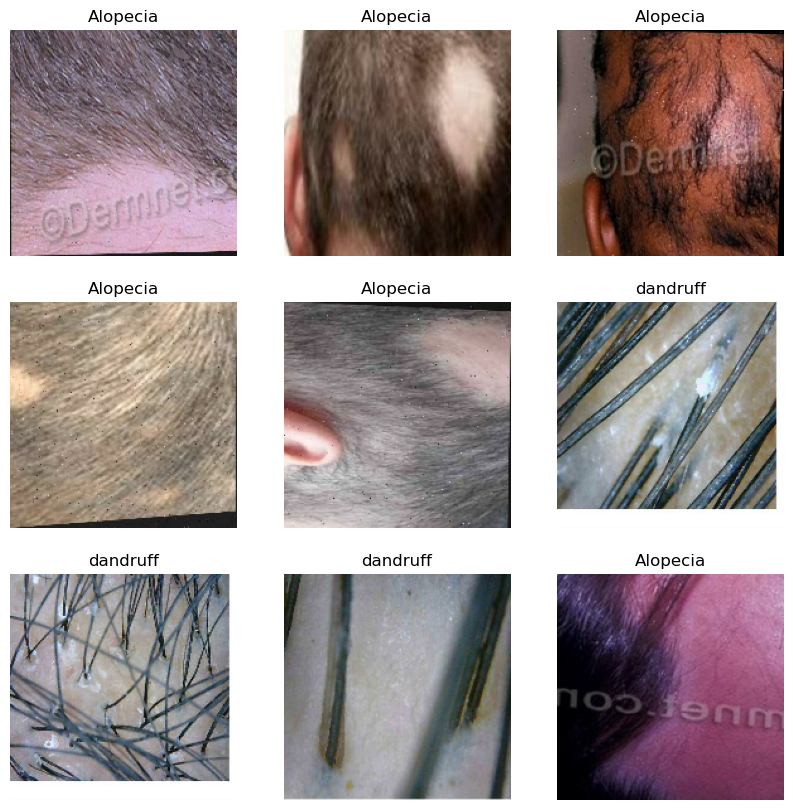

In [10]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(Diseases_names[labels[i]])
        plt.axis('off')

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [16]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [17]:
from tensorflow.keras.layers import RandomRotation

# Fixed: removed 'value_range' to ensure compatibility
RandomRotation(factor=(-0.2, 0.2))


<RandomRotation name=random_rotation, built=False>

In [23]:
from tensorflow.keras.layers import RandomZoom

RandomZoom(height_factor=0.1)


<RandomZoom name=random_zoom, built=False>

In [25]:
# data_augmentation = Sequential([
#     layers.RandomFlip("horizontal", input_shape = (img_size,img_size)),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.1)
# ])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])
# data_augmentation = keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.1)
# ])

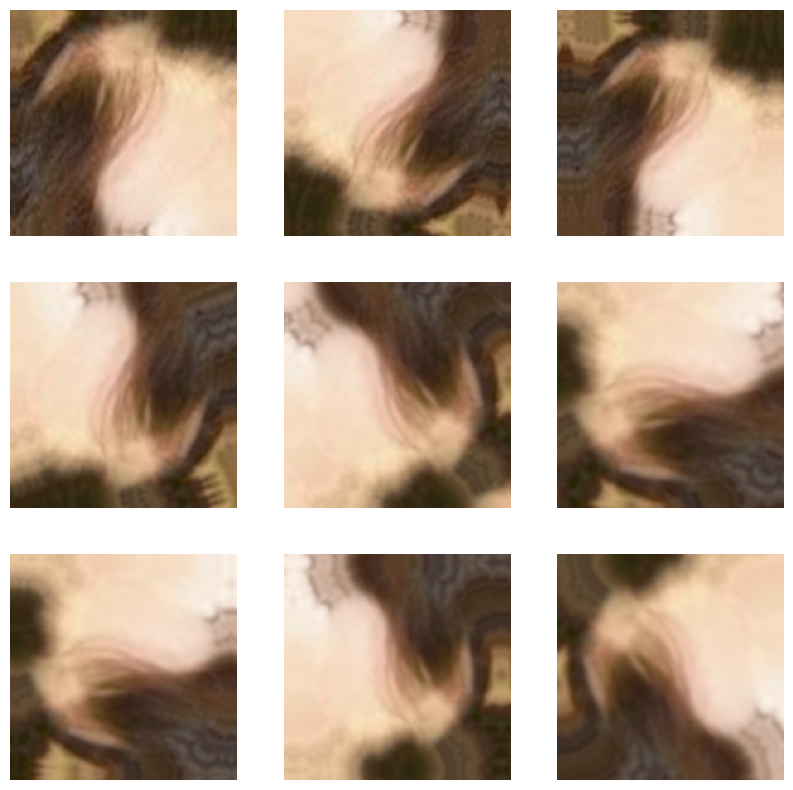

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')
# plt.figure(figsize=(10, 10))

# for images, labels in train_ds.take(1):
#     for i in range(9):
#         augmented_image = data_augmentation(tf.expand_dims(images[i], 0))  # Add batch dimension
#         plt.subplot(3, 3, i + 1)
#         plt.imshow(tf.squeeze(augmented_image).numpy().astype("uint8"))  # Remove batch dimension for display
#         plt.title(Diseases_names[labels[i]])
#         plt.axis("off")

# plt.show()

In [28]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 66s 716ms/step - accuracy: 0.7754 - loss: 0.7025 - val_accuracy: 0.9867 - val_loss: 0.0491
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 48s 560ms/step - accuracy: 0.9788 - loss: 0.0781 - val_accuracy: 0.9926 - val_loss: 0.0327
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 46s 536ms/step - accuracy: 0.9780 - loss: 0.0622 - val_accuracy: 0.9585 - val_loss: 0.1016
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 67s 788ms/step - accuracy: 0.9828 - loss: 0.0437 - val_accuracy: 0.9615 - val_loss: 0.0992
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 53s 444ms/step - accuracy: 0.9914 - loss: 0.0261 - val_accuracy: 0.9719 - val_loss: 0.0749
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 447ms/step - accuracy: 0.9871 - loss: 0.0376 - val_accuracy: 0.9926 - val_loss: 0.0193
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 444ms/step - accuracy: 0.9875 - loss: 0.0324 - val_accuracy: 0.9852 - val_loss: 0.0410
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 444ms/step - accuracy: 0.9874 - loss: 0.0301 - val_accu

In [37]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + Diseases_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [39]:
classify_images('sample/Dandruff.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


'The Image belongs to dandruff with a score of 99.25486445426941'

In [95]:
model.save('Hair_Disease.h5')